## Digital Skill Essential or known as DSE

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [31]:
df = pd.read_csv('all_pretest_combined.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column by name
df.head(3)

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.25,Q. 2 /1.25,...,Q. 71 /1.25,Q. 72 /1.25,Q. 73 /1.25,Q. 74 /1.25,Q. 75 /1.25,Q. 76 /1.25,Q. 77 /1.25,Q. 78 /1.25,Q. 79 /1.25,Q. 80 /1.25
0,ម៉ាលីស,វ៉ាន់,vmalispg1n31@era.gov.kh,Finished,22 July 2022 6:03 AM,22 July 2022 7:23 AM,1 hour 20 mins,41.52,1.25,0.00,...,1.25,0.21,0.83,1.25,0.63,0.75,0.42,0.42,0.00,0.00
1,គឹមតៃ,ហៃ,hkimtaip22n72@era.gov.kh,Finished,22 July 2022 6:04 AM,22 July 2022 6:38 AM,33 mins 29 secs,14.54,-,1.25,...,0.00,0.00,0.42,-,-,-,-,-,-,-
2,ប៊ុនលី,ទូច,tbunlypg2n84@era.gov.kh,Finished,22 July 2022 6:08 AM,22 July 2022 7:22 AM,1 hour 13 mins,45.25,1.25,0.00,...,1.25,0.00,1.04,0.00,0.63,0.50,0.83,1.25,1.25,0.00


In [32]:
# Replace - with None
columns = df.columns
for col in columns:
    # print(col)
    df[col] = df[col].replace(['-'], float(0))

In [33]:
df = df[df['State'] == "Finished"]

In [34]:
df.head(5)

,Surname,First name,Email address,State,Started on,Completed,Time taken,Grade/100.00,Q. 1 /1.25,Q. 2 /1.25,...,Q. 71 /1.25,Q. 72 /1.25,Q. 73 /1.25,Q. 74 /1.25,Q. 75 /1.25,Q. 76 /1.25,Q. 77 /1.25,Q. 78 /1.25,Q. 79 /1.25,Q. 80 /1.25
0,ម៉ាលីស,វ៉ាន់,vmalispg1n31@era.gov.kh,Finished,22 July 2022 6:03 AM,22 July 2022 7:23 AM,1 hour 20 mins,41.52,1.25,0.00,...,1.25,0.21,0.83,1.25,0.63,0.75,0.42,0.42,0.00,0.00
1,គឹមតៃ,ហៃ,hkimtaip22n72@era.gov.kh,Finished,22 July 2022 6:04 AM,22 July 2022 6:38 AM,33 mins 29 secs,14.54,0.0,1.25,...,0.00,0.00,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ប៊ុនលី,ទូច,tbunlypg2n84@era.gov.kh,Finished,22 July 2022 6:08 AM,22 July 2022 7:22 AM,1 hour 13 mins,45.25,1.25,0.00,...,1.25,0.00,1.04,0.00,0.63,0.50,0.83,1.25,1.25,0.00
3,ឈូក,ឈឿន​,cchhoukp22n15@era.gov.kh,Finished,22 July 2022 6:11 AM,22 July 2022 7:30 AM,1 hour 18 mins,33.85,0.50,1.25,...,1.25,0.00,0.42,0.0,0.31,0.50,0.83,0.00,0.00,0.00
4,វណ្ណៈ,និន,nvannakp22n109@era.gov.kh,Finished,22 July 2022 6:22 AM,22 July 2022 7:48 AM,1 hour 26 mins,10.38,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df['Grade/100.00'] = df['Grade/100.00'].astype('float64')
df.describe()

,Grade/100.00
count,3064.000000
mean,41.300251
std,17.060435
min,0.000000
25%,30.790000
50%,40.980000
75%,52.310000
max,89.420000


In [36]:
df.loc[df['Grade/100.00'] >= float(60), 'label'] = 'Passed'
df.loc[df['Grade/100.00'] < float(60), 'label'] = 'Failed'

In [37]:
df['Started on'] = pd.to_datetime(df['Started on'])
df['Completed'] = pd.to_datetime(df['Completed'])

In [38]:
num_of_examinee = len(df)
num_finished_examinee = len(df[df['State'] == "Finished"])
num_in_progress_examinee = len(df[df['State'] != "Finished"])
num_failed = len(df[df['label'] == 'Failed'])
num_passed = len(df[df['label'] == 'Passed'])


print("Total Examinee:", num_of_examinee)
print("Total Finished Examinee:", num_finished_examinee)
print("Total Examinee in Progress:", num_in_progress_examinee)
print("Number of Passed Examinee:", num_passed, " | Passing rate:", num_passed / (num_passed+num_failed))
print("Number of Failed Examinee:", num_failed, " | Failing rate:", num_failed / (num_passed+num_failed))

Total Examinee: 3064
Total Finished Examinee: 3064
Total Examinee in Progress: 0
Number of Passed Examinee: 429  | Passing rate: 0.1400130548302872
Number of Failed Examinee: 2635  | Failing rate: 0.8599869451697127


In [39]:
passed_df = df[df['label'] == 'Passed']
print("Average Score of Passed Examinee: ", passed_df['Grade/100.00'].mean())

failed_df = df[df['label'] == 'Failed']
print("Average Score of Failed Examinee: ", failed_df['Grade/100.00'].mean())

Average Score of Passed Examinee:  68.61550116550117
Average Score of Failed Examinee:  36.853100569259965


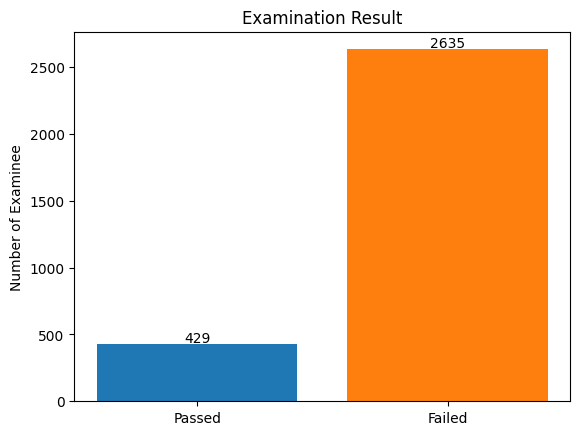

In [40]:
fig, ax = plt.subplots()

label = ['Passed', 'Failed']
height = [num_passed, num_failed]
bar_labels = ['blue', 'orange']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(label, height, label=bar_labels, color=bar_colors)

for i in range(len(height)):
    plt.text(i, i+height[i]+10, height[i], ha = 'center')

ax.set_ylabel('Number of Examinee')
plt.title("Examination Result")

plt.show()

Passing Rate: 0.14
Failed Rate: 0.86


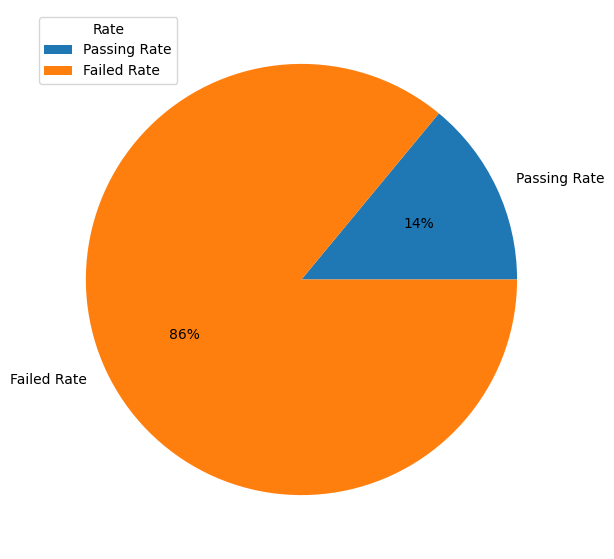

In [41]:
plt.figure(figsize=(9, 7))

passing_rate = format(num_passed / (num_passed+num_failed), '.2f')
failed_rate = format(num_failed / (num_passed+num_failed), '.2f')

print('Passing Rate:', passing_rate)
print('Failed Rate:', failed_rate)

# Data for the pie chart
labels = 'Passing Rate', 'Failed Rate'
sizes = [passing_rate, failed_rate]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%')

# Set the legend
plt.legend(title="Rate", loc='upper left')

# Show the plot
plt.show()

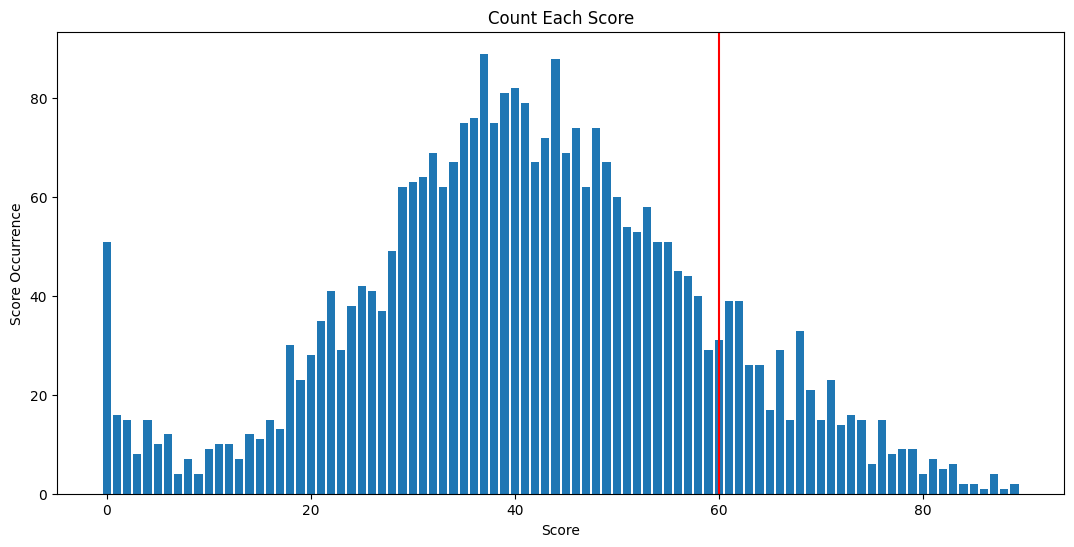

In [42]:
find_median_df = df

def convert_list_to_integers(list):
  new_list = []
  for value in list:
    try:
      new_list.append(int(value))
    except ValueError:
      pass

  return new_list

plt.figure(figsize=(13,6))

list = sorted(find_median_df['Grade/100.00'].round(0).tolist())
counter = Counter(list)
keys = counter.keys()
values = counter.values()

height = convert_list_to_integers(values) 
label = keys

plt.bar(label, height)

# for i in range(len(height)):
#     plt.text(i, i+height[i], height[i], ha = 'center')

plt.axvline(60, color='red')


plt.xlabel("Score")
plt.ylabel("Score Occurrence")
plt.title("Count Each Score")

plt.show()

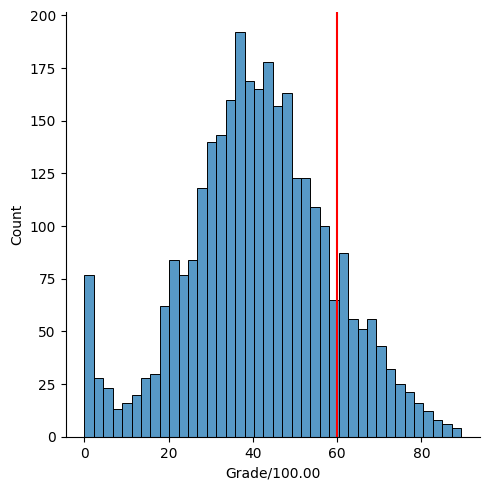

In [43]:
distribution = df

# plt.figure(figsize=(10,10))
sns.displot(distribution, 
            x="Grade/100.00", 
            bins=40)

plt.axvline(60, color='red')

# plt.savefig("Seaborn_histogram_with_displot.png",
#                     format='png',dpi=150)
